In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from glob import glob

from utils.datasets.foscal.patient import FOSCALPatient
from utils.preprocessing.numpy import get_idxs_of_annotated_slices
from metrics import compute_segmentation_metrics

# Load the data

In [2]:
patients = []
dset_dir = "/data/Datasets/stroke/ISBI_FOSCAL/"
patient_dirs = glob(os.path.join(dset_dir, "*"))
for patient_dir in patient_dirs:
    patient = FOSCALPatient(patient_dir)
    patients.append(patient)

In [6]:
modalities = ["ADC", "DWI"]
masks_daniel = patient.get_mask(modalities=modalities, radiologist="Daniel")
masks_andres = patient.get_mask(modalities=modalities, radiologist="Andres")

In [15]:
idxs_with_annotations = get_idxs_of_annotated_slices(masks_daniel["ADC"])
masks_daniel["ADC"] = masks_daniel["ADC"][..., idxs_with_annotations]

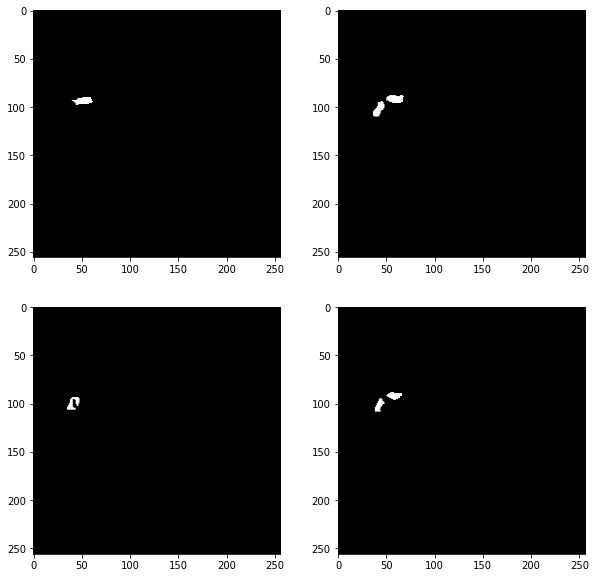

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(masks_daniel["ADC"][..., 12], cmap="gray")
axs[0, 1].imshow(masks_daniel["DWI"][..., 12], cmap="gray")
axs[1, 0].imshow(masks_andres["ADC"][..., 12], cmap="gray")
axs[1, 1].imshow(masks_andres["DWI"][..., 12], cmap="gray")

In [4]:
patient.adc_daniel_mask

# Visualize some cases

In [7]:
modalities = ["ADC", "DWI"]
normalization = "min_max"
data = patients[0].get_data(modalities=modalities, normalization=normalization)
masks = patients[0].get_mask(modalities=modalities)

In [17]:
compute_segmentation_metrics(masks["DWI"], masks["ADC"])

{'sens': 0.5670103090460725,
 'spec': 0.9999947907893522,
 'ppv': 0.9482758614192914,
 'npv': 0.9999270759902217,
 'dsc': 0.7096836627169308,
 'avd': 0.5032258064516129,
 'hd': 135.24052647043342}

# Agreement between radiologists using ADC masks

# Agreement between radiologists using DWI masks

# Agreement between ADC and DWI masks of the same radiologist